In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('tested.csv')

In [3]:
train.head(-1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

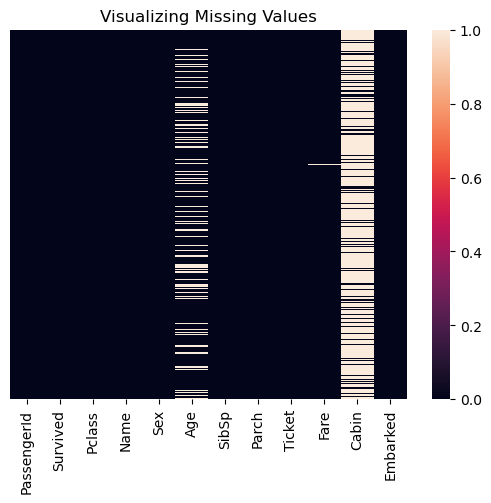

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)
plt.title ("Visualizing Missing Values")
plt.savefig('Visualizing Missing Values.png') 


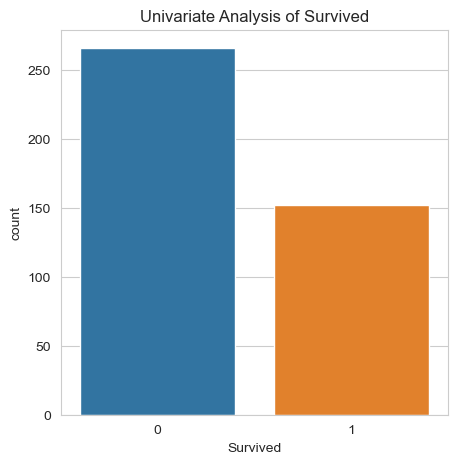

In [6]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.title('Univariate Analysis of Survived')
plt.savefig('Univariate Analysis of Survived.png')

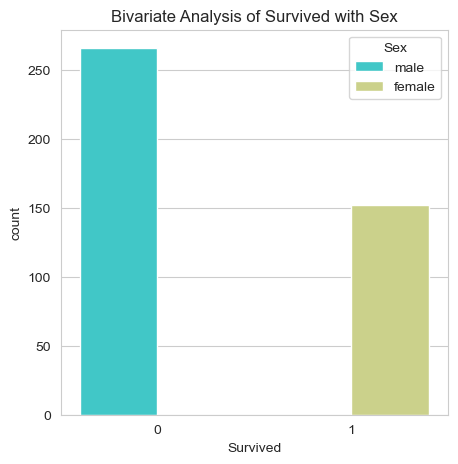

In [7]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')
plt.title('Bivariate Analysis of Survived with Sex')
plt.savefig('Bivariate Analysis of Survived.png')

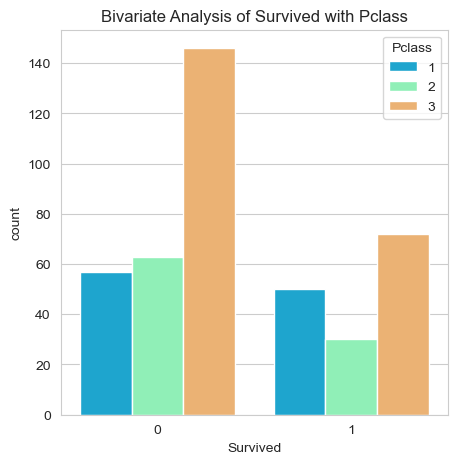

In [8]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title('Bivariate Analysis of Survived with Pclass')
plt.savefig('Bivariate Analysis of Survived.png')

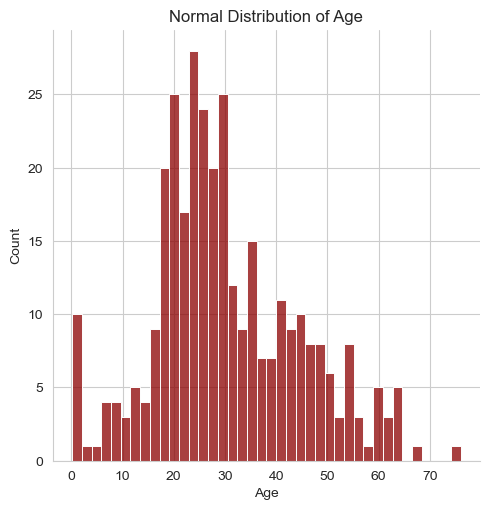

In [9]:
sns.set_style('whitegrid')
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.title('Normal Distribution of Age')
plt.savefig('Normal Distribution of Age.png')


<Axes: >

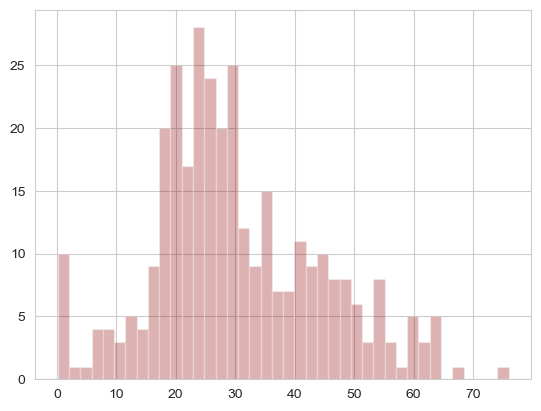

In [10]:
train['Age'].hist(color='darkred',bins=40, alpha=0.3)

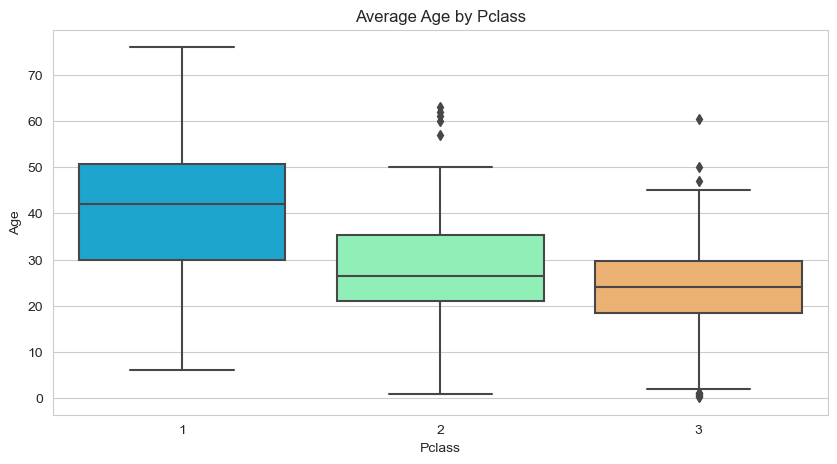

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')
plt.title('Average Age by Pclass')
plt.savefig('Average Age by Pclass.png')


In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 25
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

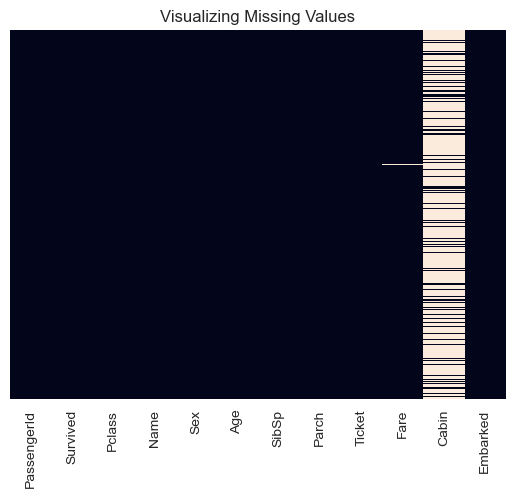

In [14]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)
plt.title('Visualizing Missing Values')
plt.savefig('Visualizing Missing Values.png')

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
195,1087,0,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,S
196,1088,0,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,C
197,1089,1,3,"Nilsson, Miss. Berta Olivia",female,18.0,0,0,347066,7.7750,S
198,1090,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,S


In [17]:
train['Embarked'] = train['Embarked'].fillna('Q')

In [18]:
train['Fare'] = train['Fare'].fillna('10.254')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 36.1+ KB


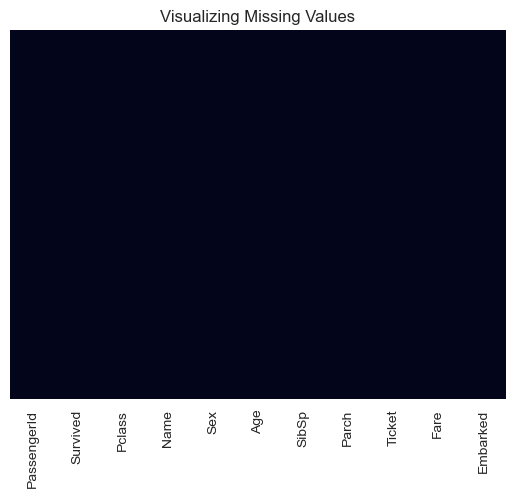

In [20]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)
plt.title('Visualizing Missing Values')
plt.savefig('Visualizing Missing Values.png')

In [21]:
embarked = pd.get_dummies(train['Embarked'])
sex = pd.get_dummies(train['Sex'])

In [22]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [24]:
train=pd.concat([train,sex,embarked],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,1,0,7.0,1,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [26]:
train.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,25.0,0,0,8.05,0,1,0,0,1
414,1306,1,39.0,0,0,108.9,1,0,1,0,0
415,1307,3,38.5,0,0,7.25,0,1,0,0,1
416,1308,3,25.0,0,0,8.05,0,1,0,0,1


In [27]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis
                                        =1),
                                                    train['Survived'],test_size=.30,
                                                    random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix


In [34]:
accuracy = confusion_matrix(y_test,predictions)


In [35]:
accuracy


array([[71,  0],
       [ 0, 55]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score


In [37]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

In [38]:
predictions


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)